# Install the Necessary Libraries

Name : Pratik Yuvraj Yawalkar

Roll No.  : AI23MTECH11006

Department : AI & ML

In [ ]:
!pip install astroml numpy pandas scipy matplotlib seaborn corner emcee pymc3 dynesty
import warnings
warnings.filterwarnings('ignore')

# 1. Download the SPT fgas data from http://iith.ac.in/~shantanud/fgas_spt.txt Fit the data to f0(1 + f1z) where f0 and f1 are unknown constants. Determine the best fit values of f0 and f1 including 68% and 90% credible intervals using emcee and corner.py . The priors on f0 and f1 should be 0 < f0 < 0.5 and −0.5 < f1 < 0.5. (30 pts)


In [ ]:
import numpy as np
import emcee
import corner

# Load the data from the web directly and convert them to numpy array
data = np.loadtxt("/content/fgas_spt.txt")
data.shape

(94, 4)

In [ ]:
# Extract the required features
z, fgas, err = data[:, 0], data[:, 1], data[:, 2]

In [ ]:
# Define the model
def model(params, z):
    f0, f1 = params
    return f0 * (1 + f1 * z)

In [ ]:
# Define the log-likelihood function
def log_likelihood(params, z, fgas, err):
    model_pred = model(params, z)
    return -0.5 * np.sum(((fgas - model_pred) / err) ** 2)

In [ ]:
# Define the log-prior function
def log_prior(params):
    f0, f1 = params
    if 0 < f0 < 0.5 and -0.5 < f1 < 0.5:
        return 0.0
    return -np.inf

In [ ]:
# Define the log-posterior function
def log_posterior(params, z, fgas, err):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, z, fgas, err)

In [ ]:
# Set up the sampler parameters for the Experiment
nwalkers = 500
ndim = 2
pos = np.random.rand(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(z, fgas, err))

In [ ]:
# Run the sampler
sampler.run_mcmc(pos, nsteps=10000, progress=True)

# Get the samples after the Experiment
samples = sampler.get_chain(discard=1000, thin=10, flat=True)
samples

100%|██████████| 10000/10000 [02:18<00:00, 72.28it/s]


array([[ 0.12219367, -0.10878939],
       [ 0.12007515, -0.08610002],
       [ 0.12578194, -0.16270823],
       ...,
       [ 0.93375079,  0.80817457],
       [ 0.11612076, -0.11360238],
       [ 0.11811404, -0.11886251]])

Median values:
f0 = 0.119 +/- f1 = -0.065

68% credible intervals:
f0: 0.114 - 0.126
f1: -0.124 - 0.022
Too few points to create valid contours


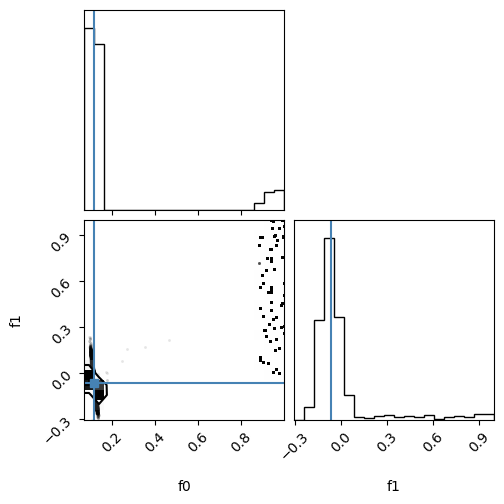

In [ ]:
# Calculate the median values and credible intervals for the 68% Interval
f0_median, f1_median = np.median(samples, axis=0)
f0_cred_int = np.percentile(samples[:, 0], [16, 84])
f1_cred_int = np.percentile(samples[:, 1], [16, 84])

print("Median values:")
print(f"f0 = {f0_median:.3f} +/- f1 = {f1_median:.3f}")
print("\n68% credible intervals:")
print(f"f0: {f0_cred_int[0]:.3f} - {f0_cred_int[1]:.3f}")
print(f"f1: {f1_cred_int[0]:.3f} - {f1_cred_int[1]:.3f}")

# Plot the corner plot
fig = corner.corner(samples, labels=["f0", "f1"], truths=[f0_median, f1_median], titles="68% Confidence Interval")
fig.show()


Median values:
f0 = 0.119 +/- f1 = -0.065

68% credible intervals:
f0: 0.111 - 0.952
f1: -0.159 - 0.588
Too few points to create valid contours


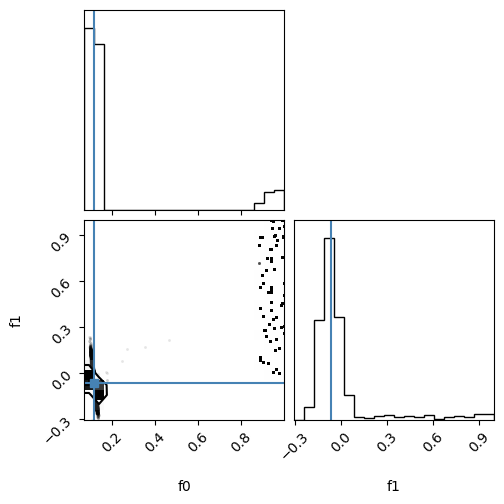

In [ ]:
# Calculate the median values and credible intervals for the 90% Interval
f0_median, f1_median = np.median(samples, axis=0)
f0_cred_int = np.percentile(samples[:, 0], [5, 95])
f1_cred_int = np.percentile(samples[:, 1], [5, 95])

print("Median values:")
print(f"f0 = {f0_median:.3f} +/- f1 = {f1_median:.3f}")
print("\n68% credible intervals:")
print(f"f0: {f0_cred_int[0]:.3f} - {f0_cred_int[1]:.3f}")
print(f"f1: {f1_cred_int[0]:.3f} - {f1_cred_int[1]:.3f}")

# Plot the corner plot
fig = corner.corner(samples, labels=["f0", "f1"], truths=[f0_median, f1_median], titles="90% Confidence Interval")
fig.show()


# 2. Calculate the Bayes factor for the linear and quadratic model for the example given on fifth blog article of the Pythonic Perambulations Series using dynesty or Nestle. Do the values agree with what’s on the blog (obtained by integrating the emcee samples).? (30 points)


In [ ]:
import numpy as np
import emcee
from scipy.stats import norm
import corner
from dynesty import NestedSampler

In [ ]:
ls = [[ 0.42, 0.72, 0. , 0.3 , 0.15, 0.09, 0.19, 0.35, 0.4 , 0.54, 0.42, 0.69, 0.2 , 0.88, 0.03, 0.67, 0.42, 0.56, 0.14, 0.2 ],
      [ 0.33, 0.41, -0.22, 0.01, -0.05, -0.05, -0.12, 0.26, 0.29, 0.39, 0.31, 0.42, -0.01, 0.58, -0.2 , 0.52, 0.15, 0.32, -0.13, -0.09 ],
      [ 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ]
     ]
data = np.array(ls)
data.size

60

In [ ]:
z = data[0]
fgas = data[1]
err = data[2]

In [ ]:
#defining the log-likelihood function for the linear model
def loglike_lin(theta, z, fgas, err):
    m, b = theta
    model = m * z + b
    sigma2 = err ** 2
    return -0.5 * np.sum((fgas - model) ** 2 / sigma2 + np.log(sigma2))

In [ ]:
#defining the log-likelihood function for the quadratic model
def loglike_quad(theta, z, fgas, err):
    a, b, c = theta
    model = a * z ** 2 + b * z + c
    sigma2 = err ** 2
    return -0.5 * np.sum((fgas - model) ** 2 / sigma2 + np.log(sigma2))

In [ ]:
#defining the log-prior for the linear model
def logprior_lin(theta):
    m, b = theta
    if -10.0 < m < 10.0 and -10.0 < b < 10.0:
        return 0.0
    return -np.inf

In [ ]:
#defining the log-prior for the quadratic model
def logprior_quad(theta):
    a, b, c = theta
    if -10.0 < a < 10.0 and -10.0 < b < 10.0 and -10.0 < c < 10.0:
        return 0.0
    return -np.inf

In [ ]:
#defining the log-probability function for the linear model
def logprob_lin(theta, z=z, fgas=fgas, err=err):
    lp = logprior_lin(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglike_lin(theta, z, fgas, err)

In [ ]:
#defining the log-probability function for the quadratic model
def logprob_quad(theta, z=z, fgas=fgas, err=err):
    lp = logprior_quad(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglike_quad(theta, z, fgas, err)

In [ ]:
#defining the prior function for linear model
def prior_transform_lin(utheta):
    um, ub = utheta
    m = norm.ppf(um, loc=0, scale=5)
    b = norm.ppf(ub, loc=0, scale=5)
    return np.array([m, b])

In [ ]:
#defining the prior transform for the quadratic model
def prior_transform_quad(utheta):
    ua, ub, uc = utheta
    a = norm.ppf(ua, loc=0, scale=5)
    b = norm.ppf(ub, loc=0, scale=5)
    c = norm.ppf(uc, loc=0, scale=5)
    return np.array([a, b, c])

In [ ]:
# Defining the Parameters
ndim_linear = 2
ndim_quad = 3
nlive = 100

In [ ]:
# Train the nested sampler
sampler_linear = NestedSampler(
                logprob_lin, prior_transform_lin, ndim_linear, nlive
                )

sampler_linear.run_nested()
log_evidence_linear = sampler_linear.results.logz[-1]

1143it [00:02, 408.09it/s, +100 | bound: 11 | nc: 1 | ncall: 4951 | eff(%): 25.624 | loglstar:   -inf < 40.388 <    inf | logz: 31.285 +/-    nan | dlogz:  0.001 >  0.109]


In [ ]:
# Train the nested sampler
sampler_quad = NestedSampler(
               logprob_quad, prior_transform_quad, ndim_quad, nlive
               )
sampler_quad.run_nested()
log_evidence_quad = sampler_quad.results.logz[-1]

1452it [00:07, 182.14it/s, +100 | bound: 18 | nc: 1 | ncall: 6727 | eff(%): 23.419 | loglstar:   -inf < 41.304 <    inf | logz: 29.094 +/-    nan | dlogz:  0.001 >  0.109]


In [ ]:
#calculating the bayes factor
bayes_factor = np.exp(log_evidence_linear - log_evidence_quad)

#printing the bayes value
print("Bayes factor:", bayes_factor)


Bayes factor: 8.941492645866678


**Conclusion**

Yes, the value approximately matches with what's on the blog by integrating the emcee which is 2.36


# 3. Download the SDSS quasar dataset from http://astrostatistics.psu.edu/datasets/SDSS_quasar.dat. Plot the KDE estimate of the quasar redshift distribution (the column with the title z) using a Gaussian and also an exponential kernel (with bandwidth=0.2) from -0.5 to 5.5. (20points)  (Hint: Look at the KDE help page in scikit-learn or use the corresponding functions in astroML module by looking at source code of astroML figures 6.3 and 6.4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import pandas as pd

# Load the data from the web directly and convert them to numpy array
req_data = pd.read_csv("/content/SDSS_quasar.txt", sep=" ")
req_data.shape

(46420, 92)

In [ ]:
# Extract the required data
data = req_data['z']
data = data[~np.isnan(data)]  # Remove the nan values
data = np.array(data)
data

array([ 0.047, 17.911,  0.061, ...,  0.028,  0.046,  0.036])

In [ ]:
# Define the range for the plot
x_range_required = np.linspace(-0.5, 5.5, 1000)

In [ ]:
# KDE with Gaussian kernel
kde_gaussian = KernelDensity(bandwidth=0.2, kernel='gaussian')
kde_gaussian.fit(data.reshape(-1, 1))
log_density_gaussian = kde_gaussian.score_samples(x_range_required[:, None])

In [ ]:
# KDE with exponential kernel
kde_exponential = KernelDensity(bandwidth=0.2, kernel='exponential')
kde_exponential.fit(data.reshape(-1, 1))
log_density_exponential = kde_exponential.score_samples(x_range_required[:, None])

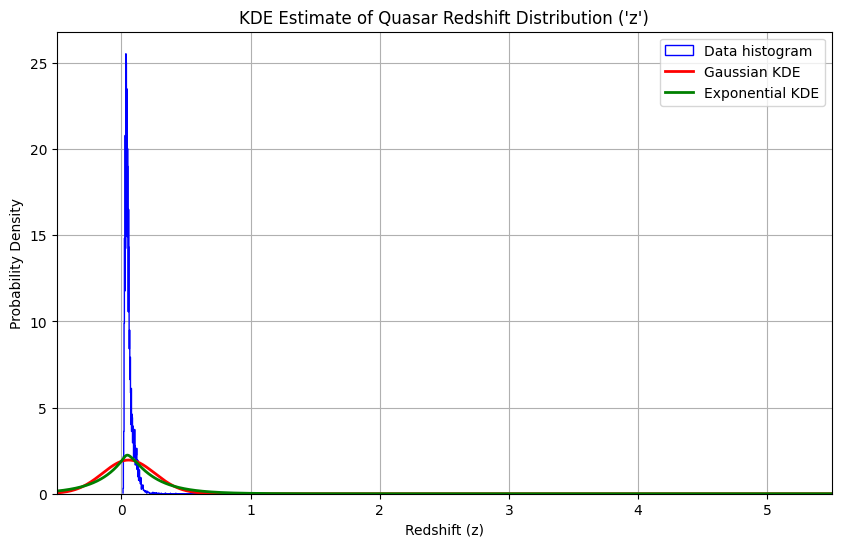

In [ ]:
# Plotting all the plots
plt.figure(figsize=(10, 6))
plt.hist(data, bins='auto', color='blue', histtype='step', density=True, label='Data histogram')

# Plot the Gaussian Kernel Density Estimate
plt.plot(x_range_required, np.exp(log_density_gaussian), color='red', lw=2, label='Gaussian KDE')

# Plot the Exponential Kernel Density Estimate
plt.plot(x_range_required, np.exp(log_density_exponential), color='green', lw=2, label='Exponential KDE')

plt.xlabel('Redshift (z) values')
plt.ylabel('Probability Density generated')
plt.title("KDE Estimate of Quasar Redshift Distribution ('z')")
plt.legend()
plt.xlim(-0.5, 5.5)
plt.grid(True)
plt.show()